In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import graph_gen as gg
import graph
from k_means_gnn import k_means_gnn, KmeansConceptFinder
import torch as t
import numpy as np
from sklearn import cluster
from torch_geometric.datasets.tu_dataset import TUDataset
from torch_geometric.loader import DataLoader
import networkx as nx
import matplotlib.pyplot as plt

# # ## Mutagenicity
# mutag_dataset = TUDataset("Datasets", "Mutagenicity")
# data_loader = DataLoader(mutag_dataset, batch_size=len(mutag_dataset))

# mutag_graph = None
# for g in data_loader:
#     mutag_graph = graph.Graph((g.x, g.edge_index))


# concept_finder = KmeansConceptFinder(10, initial_gamma=10)
# concept_finder.find_concepts(mutag_graph, "testsav")
# # print(concept_finder.concepts)

/home/wash/Work/Cambridge/PartIII/L45/gnn_project/GCExplainer-unsupervised/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Each row is a concept. Each item in a row is an example of that concept.
60
61
165
166
261
22563
29937
33765
60473
103718
2
3
6
7
107
45471
69770
92458
123976
126665
572
573
2514
7341
7482
109991
53
54
55
57
1219
1220
1221
1222
1223
5387
5388
5390
5391
12950
29387
122184
43080
100344
102311
183
5494
8218
8564
9574


/home/wash/Work/Cambridge/PartIII/L45/gnn_project/GCExplainer-unsupervised/src/gcf.py:87: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


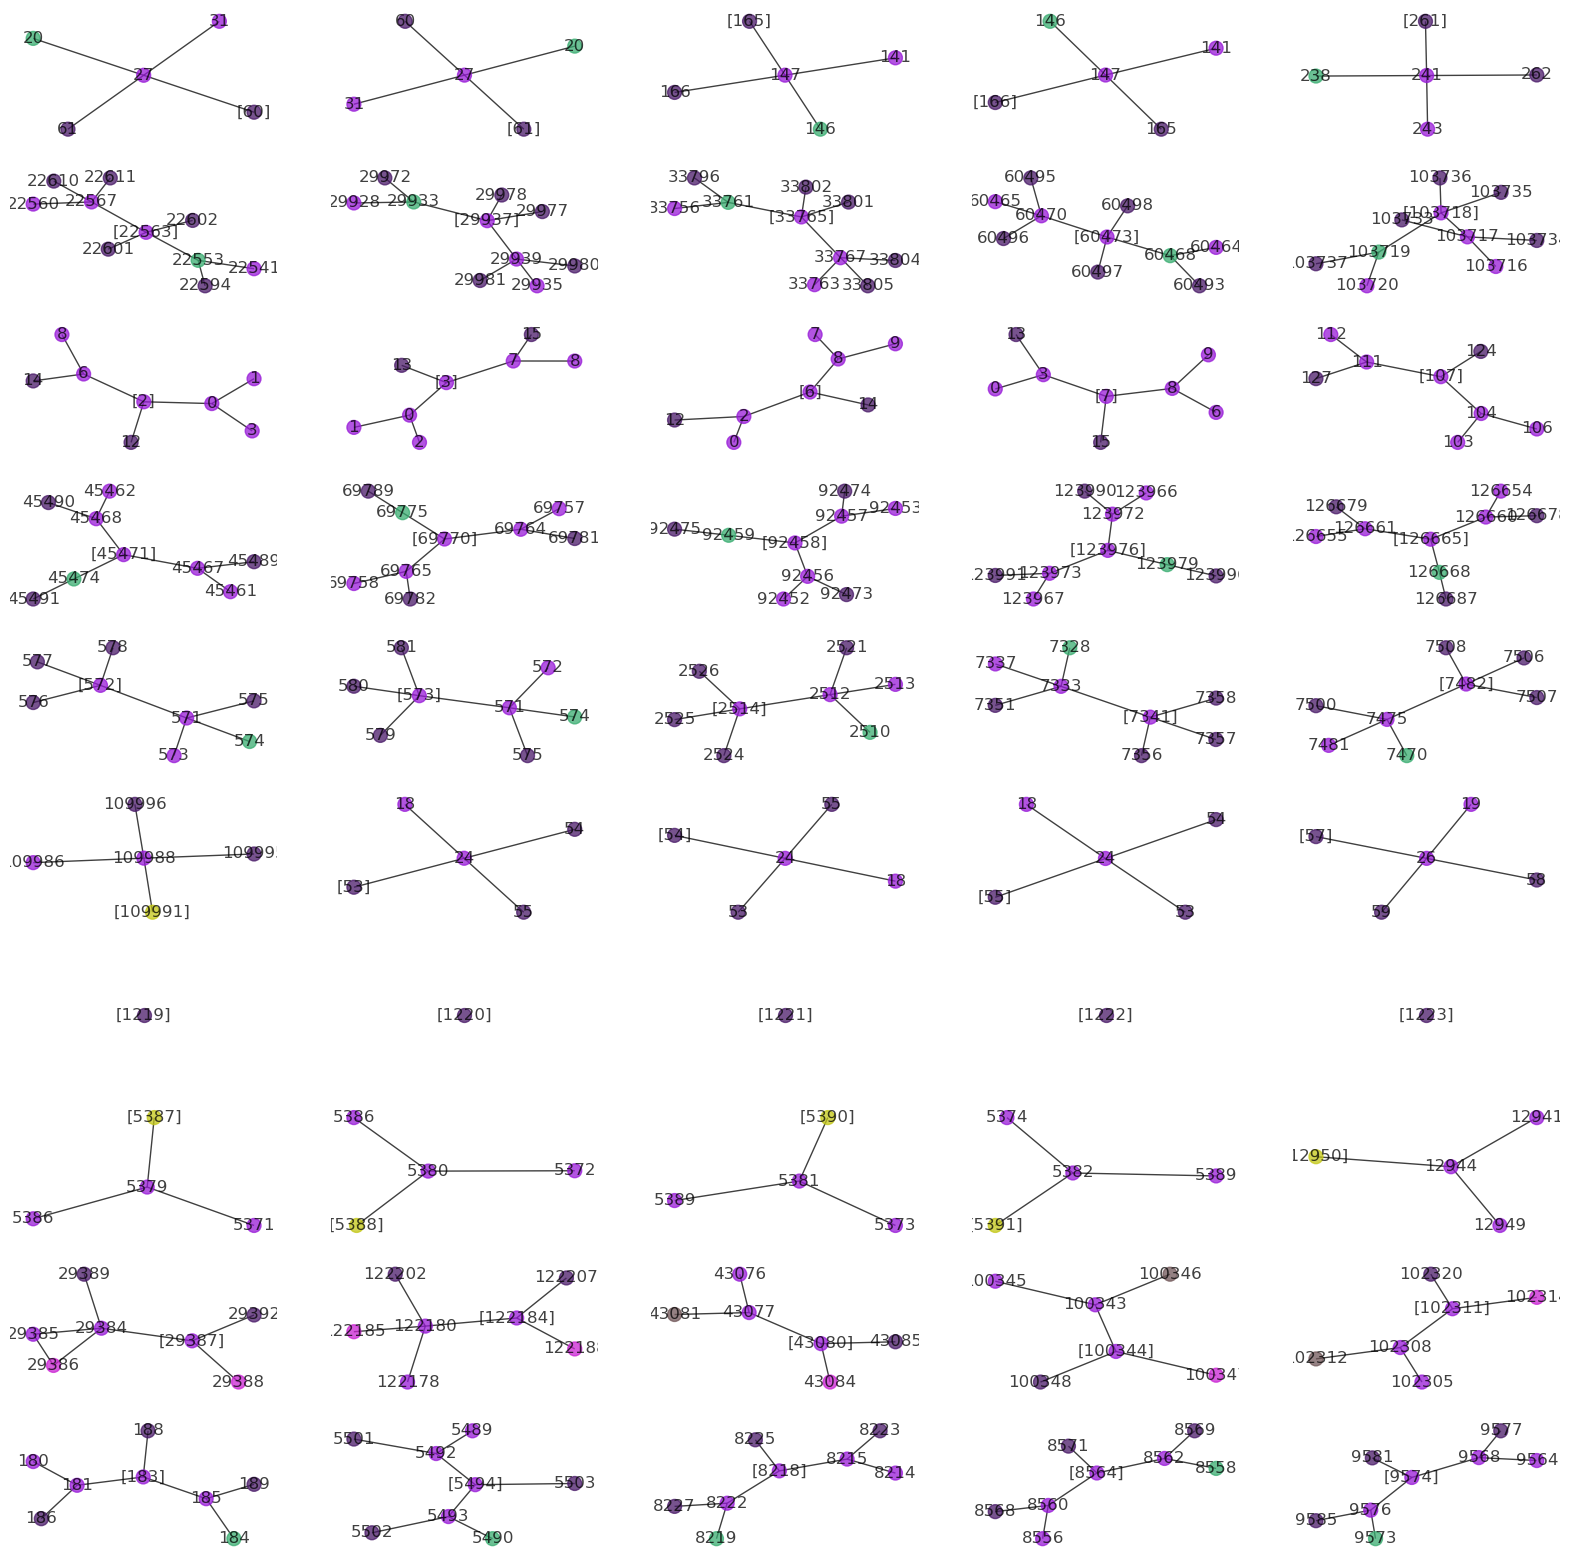

In [3]:
concept_finder.draw_concepts()

In [4]:
t.save(concept_finder, "/tmp/mutag_concept")

In [3]:
concept_finder = t.load("/tmp/mutag_concept")

In [7]:
cols = ['b','g','r','c','m','y',"k","k","k","k","k","k","k","k"]
# labels = ["C", "N", "O", "F", "I", "Cl", "Br"] + ["?" for _ in range(14)]
labels = ["" for _ in range(14)]

colourmap = lambda x: cols[np.argmax(x)]
labelmap = lambda x: labels[np.argmax(x)]

In [31]:
concept_finder.graph.pyg_data.x

torch.Size([131488, 14])

In [27]:
(t.argmax(concept_finder.graph.pyg_data.x,dim=1)>6).numpy().nonzero()[0].shape

(925,)

Each row is a concept. Each item in a row is an example of that concept.
60
61
165
166
261
22563
29937
33765
60473
103718
2
3
6
7
107
45471
69770
92458
123976
126665
572
573
2514
7341
7482
109991
53
54
55
57
1219
1220
1221
1222
1223
5387
5388
5390
5391
12950
29387
122184
43080
100344
102311
183
5494
8218
8564
9574


/home/wash/Work/Cambridge/PartIII/L45/gnn_project/GCExplainer-unsupervised/src/gcf.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


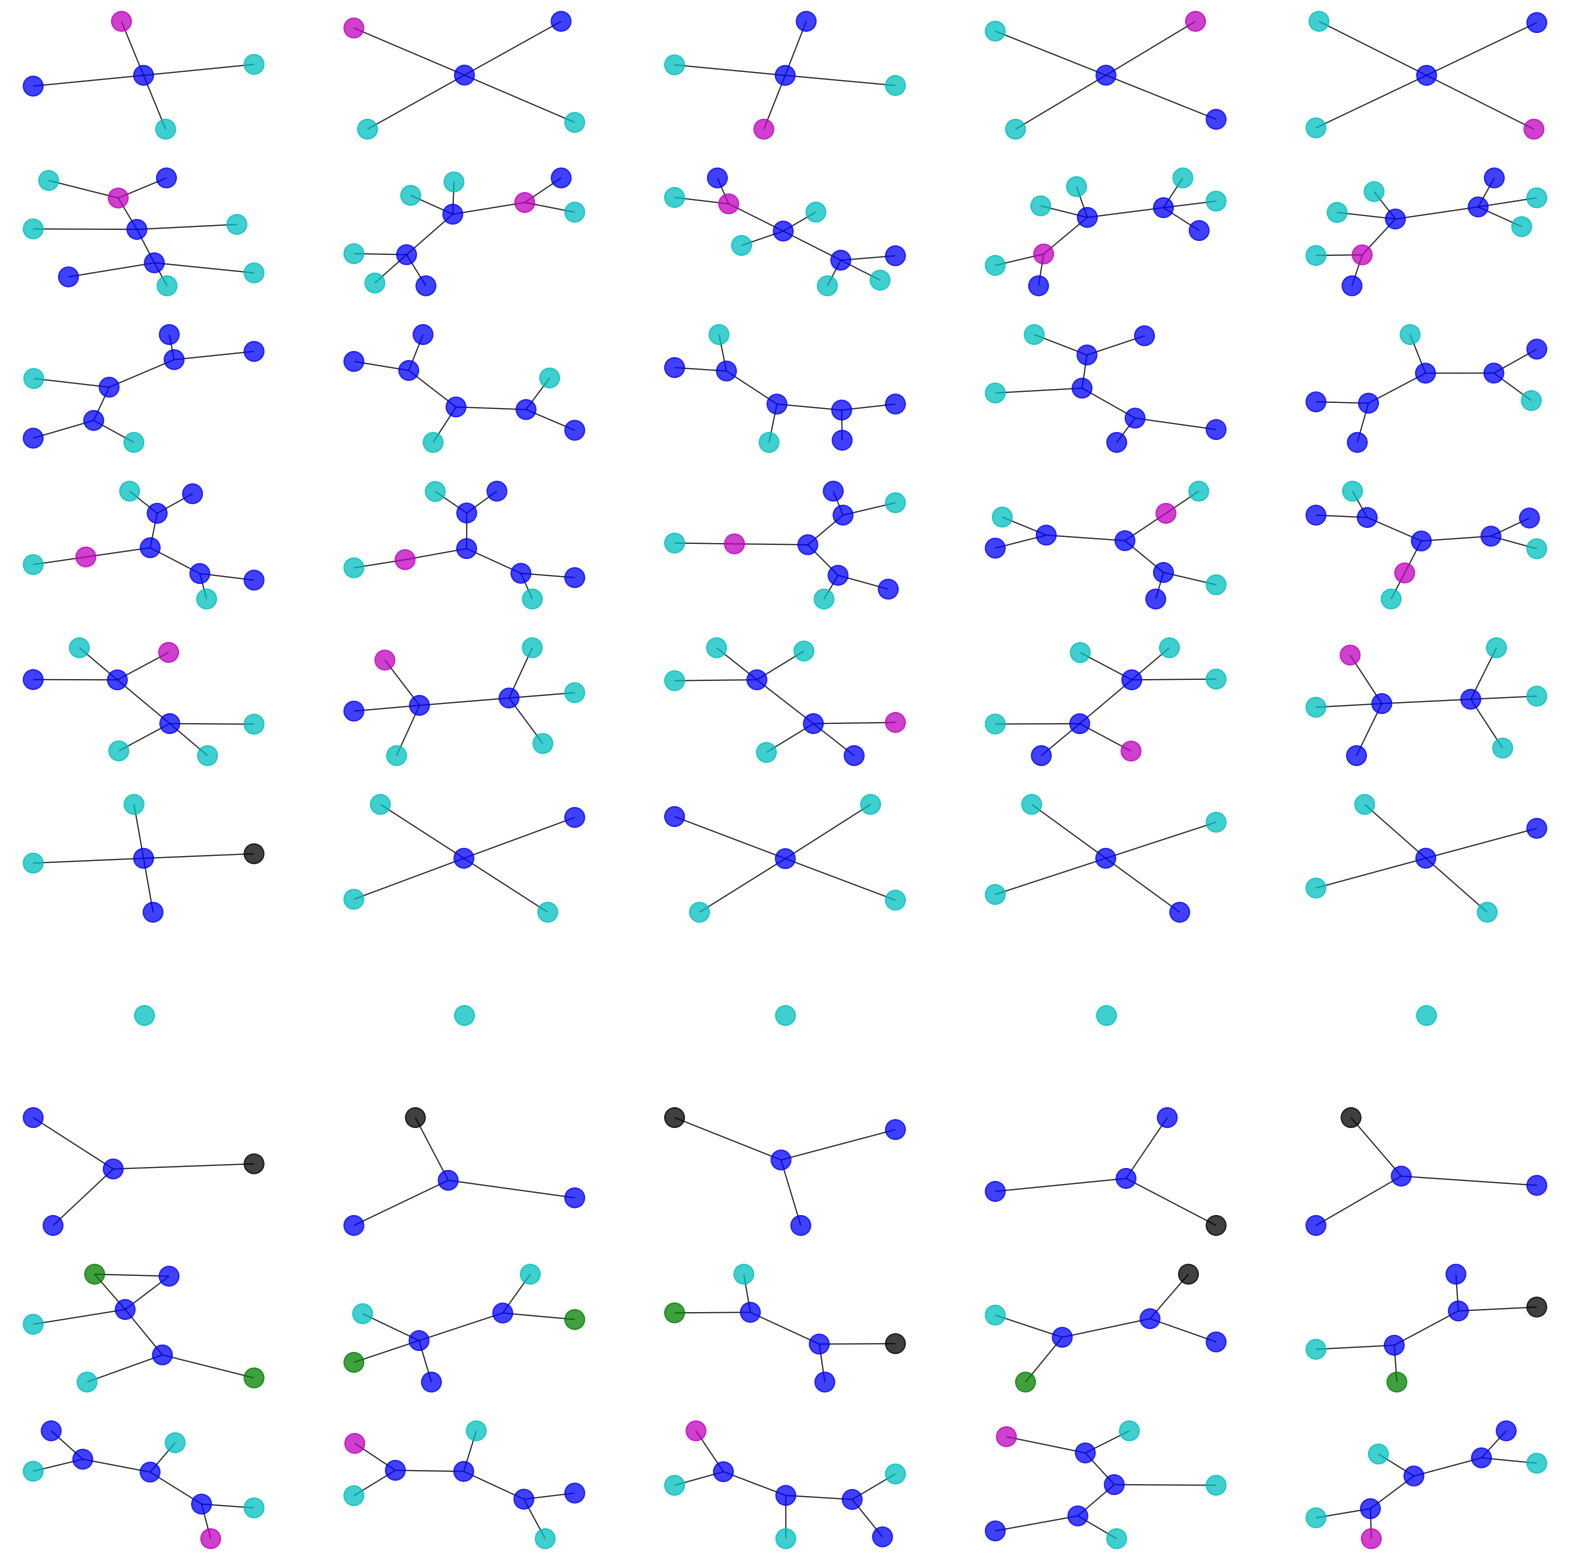

In [9]:
concept_finder.draw_concepts(colourmap=colourmap, labelmap=labelmap)